OpenEnded Task Using Logistic Regression

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# Load Training and Testing Data
train_df = pd.read_csv("mnist_train.csv")  # Training dataset
test_df = pd.read_csv("mnist_test.csv")    # Testing dataset

In [3]:
# Split into Input (X) and Output (y)
X_train = train_df.drop(columns=['label']).values  # Features (784 pixel columns)
y_train = train_df['label'].values  # Labels (digits 0-9)

X_test = test_df.drop(columns=['label']).values  # Features for testing
y_test = test_df['label'].values  # Labels for testing

In [4]:
# Normalize Data for Faster Convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train One-vs-All Logistic Regression Model
classifiers = {}  # Store models for each digit

for digit in range(10):
    # Convert labels into binary (One vs All)
    y_train_binary = (y_train == digit).astype(int)
    y_test_binary = (y_test == digit).astype(int)

    # Train Logistic Regression for the Current Digit
    clf = LogisticRegression(solver='lbfgs', max_iter=500, tol=0.01)
    clf.fit(X_train_scaled, y_train_binary)

    # Store Classifier
    classifiers[digit] = clf

In [6]:
# Check Accuracy of Individual Classifiers
individual_accuracies = {}
for digit, clf in classifiers.items():
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score((y_test == digit).astype(int), y_pred)
    individual_accuracies[digit] = accuracy
    print(f"Accuracy for digit {digit}: {accuracy:.4f}")

Accuracy for digit 0: 0.9871
Accuracy for digit 1: 0.9884
Accuracy for digit 2: 0.9742
Accuracy for digit 3: 0.9730
Accuracy for digit 4: 0.9774
Accuracy for digit 5: 0.9672
Accuracy for digit 6: 0.9837
Accuracy for digit 7: 0.9739
Accuracy for digit 8: 0.9595
Accuracy for digit 9: 0.9611


In [7]:
# One-vs-All Final Prediction
probabilities = np.array([classifiers[d].predict_proba(X_test_scaled)[:, 1] for d in range(10)]).T
final_predictions = np.argmax(probabilities, axis=1)

In [28]:
# Print the first 10 predictions and actual labels
print("First 15 Predicted Labels:", final_predictions[:15])
print("First 15 Actual Labels:   ", y_test[:15])

First 15 Predicted Labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
First 15 Actual Labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


In [8]:
# Compute Overall Accuracy
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Overall One-vs-All Accuracy: {final_accuracy:.4f}")

Overall One-vs-All Accuracy: 0.8889


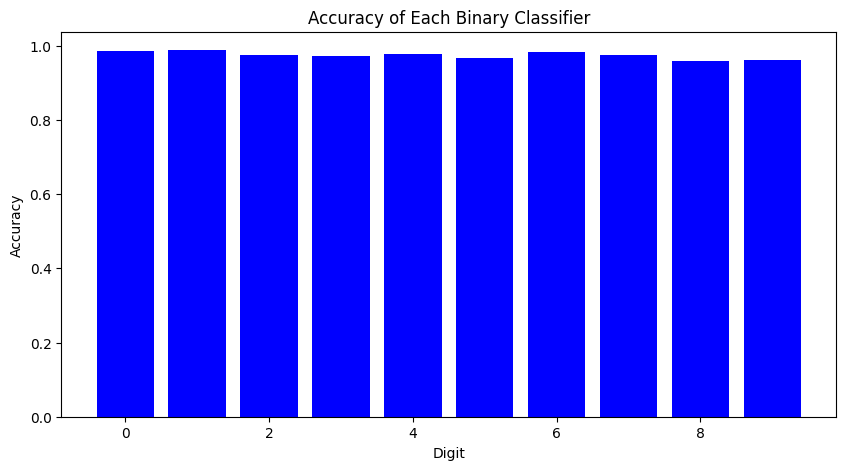

In [9]:
# Plot Accuracy of Each Classifier
plt.figure(figsize=(10, 5))
plt.bar(individual_accuracies.keys(), individual_accuracies.values(), color='blue')
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Accuracy of Each Binary Classifier")
plt.show()

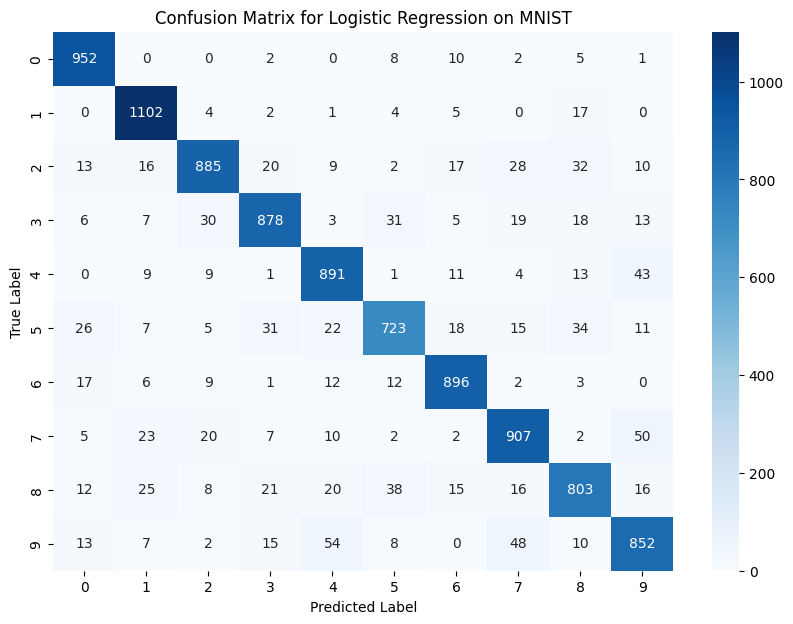

In [24]:
 # confusion matrix
cm = confusion_matrix(y_test, final_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression on MNIST")
plt.show()